In [31]:
import pandas as pd 
import xml.etree.ElementTree as et 
import matplotlib.pyplot as plt

def id_plot():
    bins_list = []
    for i in range(0, 8200, 100):
        bins_list.append(i)
    #print("List", bins_list)
    return bins_list

def oficina_plot():
    bins_list = []
    for i in range(0, 3000, 100):
        bins_list.append(i)
    #print("List", bins_list)
    return bins_list



xtree = et.parse("xml_csv.xml")
xroot = xtree.getroot() 

df_cols = ['d_tipo_asentamiento', 'id_asenta_cpcons','c_oficina']
rows = []

for node in xroot: 
    s_d_tipo_asentamiento = node.find("d_tipo_asentamiento").text
    s_id_asenta_cpcons = node.find("id_asenta_cpcons").text
    s_c_oficina = node.find("c_oficina").text 
    
    rows.append({"d_tipo_asentamiento": s_d_tipo_asentamiento, "id_asenta_cpcons": s_id_asenta_cpcons, 
                 "c_oficina": s_c_oficina})

df = pd.DataFrame(rows, columns = df_cols)

In [32]:
# Just to see the information and see how many times each element is repeated
d_tipo_asentamiento_plot = df['d_tipo_asentamiento'].value_counts()
print(d_tipo_asentamiento_plot)

0                        4334
Colonia                  1806
Ranchería                1348
Pueblo                    958
Fraccionamiento           642
Barrio                    520
Conjunto habitacional     163
Unidad habitacional       118
Ejido                      89
Residencial                41
Rancho                     30
Finca                      28
Poblado comunal            26
Hacienda                   19
Zona comercial             18
Condominio                 16
Zona industrial            11
Equipamiento                9
Villa                       6
Congregación                4
Exhacienda                  4
Estación                    3
Zona federal                3
Aeropuerto                  2
Name: d_tipo_asentamiento, dtype: int64


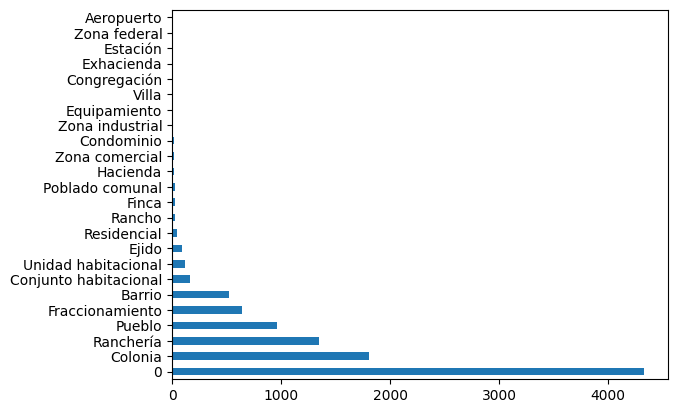

In [33]:
d_tipo_asentamiento_plot = df['d_tipo_asentamiento'].value_counts().plot(kind='barh')
plt.savefig('diagrams/d_tipo_asentamiento_plot.png')
plt.show()

In [34]:
# We need to define the range that each separation of the values is going to be
# For that we need to find the max value from the data in order to don't miss any value
# We decided a separation of 100 for the graph (100, 200, 300...) like: how many numbers there are between 0 and 100.
# The final number was 8200 due to the count is of 100 and 8118 is between 8100 and 8200.

id_asenta_cpcons_plot = df['id_asenta_cpcons'].astype(int).max()
print(id_asenta_cpcons_plot)

8118


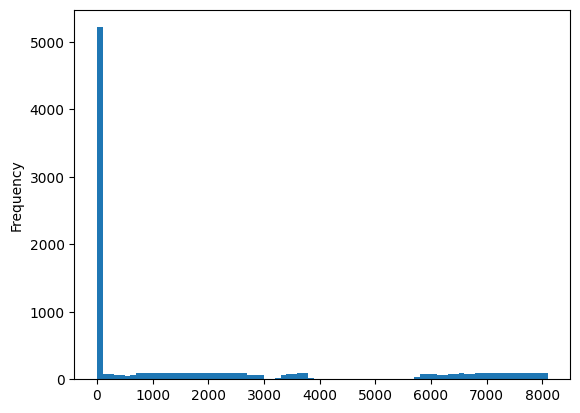

In [35]:
id_asenta_cpcons_plot = df['id_asenta_cpcons'].astype(int).plot.hist(bins=id_plot())
plt.savefig('diagrams/id_asenta_cpcons_plot.png')
plt.show()

In [69]:
# We wanto to know and put the mean for the "c_oficita" data
c_oficina_mean = df['c_oficina'].astype(int).value_counts().mean()
print(c_oficina_mean)

242.8095238095238


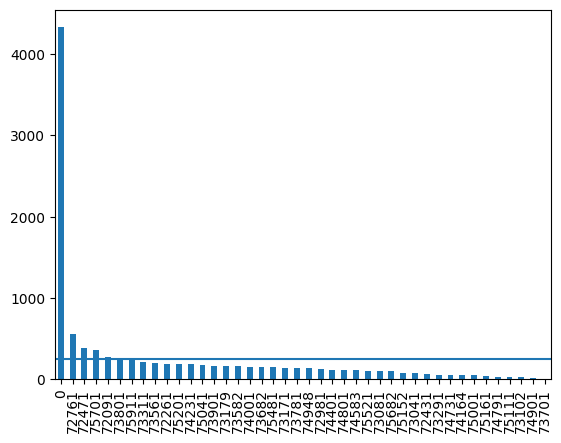

In [71]:

c_oficina_plot = df['c_oficina'].astype(int).value_counts().plot.bar()
plt.axhline(y=c_oficina_mean)
plt.savefig('diagrams/c_oficina_plot.png')
plt.show()

#values = pd.Series(df['id_asenta_cpcons'].astype(int))
#id_asenta_cpcons_plot = values.plot.hist(grid=True, bins=id_plot())